
# GMMs

A simple demonstration of Gaussian Mixture Models in Python, based on the lecture [GMM (Gaussian Mixture Models) tutorial for Astronomy in python](https://www.youtube.com/watch?v=W0XECm4-3LI) by Jake VanderPlas in 2014.

Nb: This code has been updated from the above YouTube lecture to support Python 3 and a slightly newer version of `sklearn`.


In [1]:
%matplotlib inline

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set()

(-10, 20)

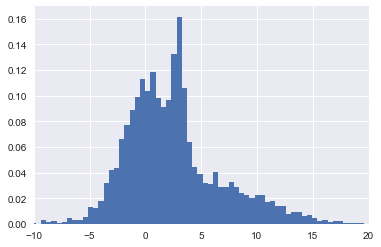

In [2]:

# Generate our data
np.random.seed(2)
x = np.concatenate([
    np.random.normal(0, 2, 2000),
    np.random.normal(5, 5, 2000),
    np.random.normal(3, 0.5, 600)
]).reshape(-1, 1)

plt.hist(x.flatten(), 80, density=True)
plt.xlim(-10, 20)


(-10, 20)

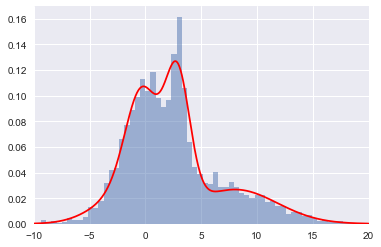

In [3]:

from sklearn.mixture import GaussianMixture

mm = GaussianMixture(4, max_iter=500, random_state=3).fit(x)
x_pdf = np.linspace(-10, 20, 1000).reshape(-1, 1)
y_pdf = np.exp(mm.score_samples(x_pdf))

plt.hist(x.flatten(), 80, density=True, alpha=0.5)
plt.plot(x_pdf.flatten(), y_pdf.flatten(), '-r')
plt.xlim(-10, 20)


In [4]:
print(mm.means_)

[[-1.74282836]
 [ 8.05651456]
 [ 2.88362651]
 [-0.25003172]]


In [5]:
print(mm.covariances_)

[[[ 7.38989092]]

 [[14.23754934]]

 [[ 1.25025148]]

 [[ 2.20798426]]]


In [6]:
print(mm.weights_)

[0.15321104 0.25284723 0.28306308 0.31087864]


(-10, 20)

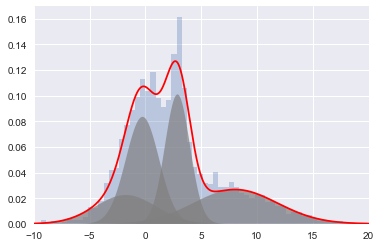

In [7]:

# Plot individual gaussians
plt.hist(x.flatten(), 80, density=True, alpha=0.3)
plt.plot(x_pdf, y_pdf, '-r')

for i in range(mm.n_components):
    pdf = (
        mm.weights_[i] *
        stats.norm(
            mm.means_[i, 0],
            np.sqrt(mm.covariances_[i, 0])
        ).pdf(x_pdf)
    )
    plt.fill(x_pdf, pdf, facecolor='gray', edgecolor='none', alpha=0.7)

plt.xlim(-10, 20)


In [8]:

# What is the BIC / AIC?
print(mm.bic(x))
print(mm.aic(x))


25825.65465210215
25754.8827246949


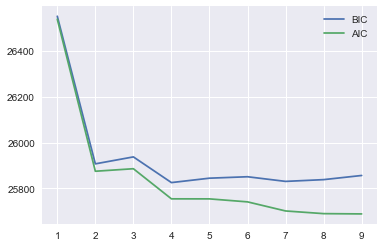

In [9]:

# Sweep a range of possible mixtures
n_estimators = np.arange(1, 10)
mms = [GaussianMixture(n, max_iter=1000, random_state=3).fit(x) for n in n_estimators]
bics = [mm.bic(x) for mm in mms]
aics = [mm.aic(x) for mm in mms]

plt.plot(n_estimators, bics, label="BIC")
plt.plot(n_estimators, aics, label="AIC")
plt.legend()


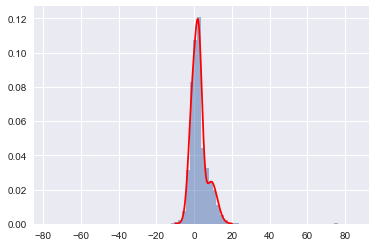

In [10]:

# Generative models are probabilistic models from which a datasaet can be generated
# They can be useful for outlier detection

np.random.seed(0)

# Add 20 outliers
true_outliers = np.sort(np.random.randint(0, len(x), 20))
y = x.copy()
y[true_outliers, :] += 50 * np.random.randn(20, 1)

mm = GaussianMixture(4, max_iter=500, random_state=0).fit(y)
x_pdf = np.linspace(-10, 20, 1000).reshape(-1, 1)
y_pdf = np.exp(mm.score_samples(x_pdf))

plt.hist(y.flatten(), 80, density=True, alpha=0.5)
plt.plot(x_pdf, y_pdf, '-r')


True outliers:
[  99  537  705 1033 1653 1701 1871 2046 2135 2163 2222 2496 2599 2607
 2732 2893 2897 3264 3468 4373]
Detected outliers
[  99  537  705 1653 2046 2130 2135 2163 2222 2496 2724 2732 2893 2897
 3067 3173 3253 3468 3483 4373]


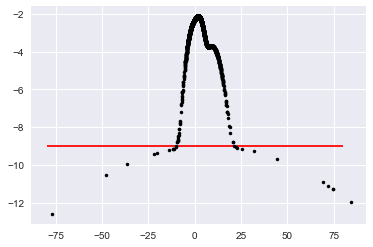

In [11]:

log_likelihood = mm.score_samples(y)
plt.plot(y.flatten(), log_likelihood.flatten(), '.k')

# Select a threshold for outliers
outlier_threshold = -9
plt.hlines(-9, -80, 80, 'r')
detected_outliers = np.where(log_likelihood < -9)[0]

print("True outliers:")
print(true_outliers)

print("Detected outliers")
print(detected_outliers)


In [12]:

# The set of false negatives (outliers we missed)
set(true_outliers) - set(detected_outliers)


{1033, 1701, 1871, 2599, 2607, 3264}

In [13]:

# The set of false positives (inliers we mistakenly excluded)
set(detected_outliers) - set(true_outliers)


{2130, 2724, 3067, 3173, 3253, 3483}